# Plotting con *seaborn*

Si ritiene comunemente che `Matplotlib` abbia una sintassi non facile e che i default di alcuni argomenti non siano ottimi. matplotlib richiede infatti di essere "studiato". <br>
Il package `seaborn` è costruito sopra *Matplotlib* e lo **estende** in modo user-friendly, ad esempio con potenti plot statistici. *seaborn* è **ben integrato** con *numpy*, *pandas* e *scipy*. Inoltre **non nasconde la API di Matplotlib** e così permette di modificare (migliorare) i plot scritti con Matplotlib.

Un'ottima alternativa a *seaborn* è [Bokeh](https://bokeh.org/), un package per la visualizzazione interattiva, pensato per il web ed in particolare per Jupyter. Si basa sulla grammatica dei grafici (*The Grammar of Graphics* di Leland Wilkinson), ed in questo senso costituisce un'alternativa python a `ggplot` di Wickham per R.

Per usare *seaborn* servono le seguenti librerie:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

*Matplotlib* fornisce alcuni **stili di plotting** (*plotting styles*) [Vedi anche nb *matplotlib*]. Impostiamo lo stile di default per *seaborn* con una <u>leggera griglia grigia di sfondo</u>.<br>
La <u>lista</u> degli stili disponibili in *Matplotlib* e dei loro effetti grafici è disponibile [qui](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [2]:
# settaggio una tantum:
# mpl.style.use('seaborn')
sns.set_theme(font_scale=1.0)

Molte funzioni di *seaborn* sono **progettate per accettare dataframe di pandas in input**. In questo modo, ad esempio, possiamo  indicare le colonne di uno scatterplot come colonne di un dataframe pandas. 

## Plot statistici
Pre-requisito: avere seguito (almeno in parte) il corso sul Machine Learning predittivo.<br>
Useremo *dummy data* (cioè, privi di significato) generati randomicamente.

In [3]:
# creazione delle coordinate del dataset:
np.random.seed(9989)
num_points = 100
gradient = 0.5
x = np.array(range(num_points))
y = np.random.randn(num_points) * 10 + x*gradient

# creazione del dataframe pandas:
data = pd.DataFrame({'dummy x':x, 'dummy y':y})

In [4]:
data.head()

,dummy x,dummy y
0,0,15.647707
1,1,3.365661
2,2,-5.027476
3,3,14.574908
4,4,-2.916389


Vediamo come fare il plot della **regressione lineare** (sui dati prima creati), tramite l'apposita funzione `lmplot`. <br>
NB. seaborn **condivide** il contesto globale di [pyplot](https://matplotlib.org/stable/tutorials/pyplot.html): è quindi possibile salvare il plot <u>come si farebbe in matplotlib</u>.

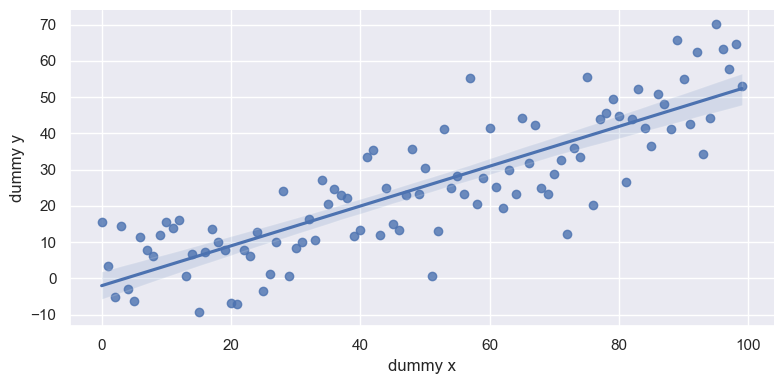

In [5]:
sns.lmplot(data=data, x='dummy x', y='dummy y', 
           height=4,    # l'altezza del plot (in pollici)
           aspect=2)    # l'aspect ratio del plot (ampiezza / altezza)

plt.tight_layout()
plt.savefig('lr_plot.png')

Il plot visualizza il **fit lineare** (sulla nuvola dei punti) e gli **intervalli di confidenza** (default: 95%).

*seaborn* permette molte personalizzazioni del plot; ad esempio:

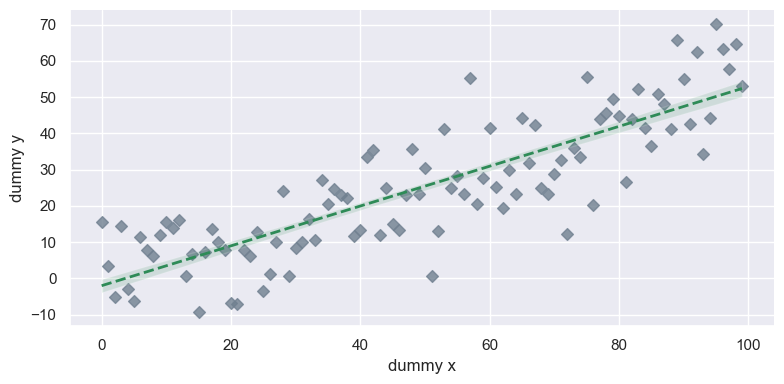

In [6]:
# sns.set_context(rc={"figure.figsize": (8, 4)})
sns.lmplot(data=data, x='dummy x', y='dummy y', height=4, aspect=2,
           
           scatter_kws={"color": "slategray"},                               # gli argomenti keyword dello scatter plot, 
                                                                             # qui il colore dei punti
           
           line_kws={"linewidth": 2, "linestyle":'--', "color": "seagreen"}, # gli argomenti keyword del line plot, qui
                                                                             # l'ampiezza e lo stile della linea
           
           markers='D',                                                      # imposta i marker a "diamond" (codifica matplotlib)
           
           ci=68                                                             # imposta l'intervallo di confidenza al 68%,
                                                                             # che corrisponde a +- 1 deviazione standard
           
           )

## Altri plot

*seaborn* offre, oltre ai plot di matplotlib, anche <u>altri utili plot</u>: in particolare le ***FacetGrids*** e le ***PairGrids***.

**FacetGrids**<br>
Anche dette plot [*lattice*](https://en.wikipedia.org/wiki/Lattice_graph) oppure [*trellis*](https://en.wikipedia.org/wiki/Trellis_(graph)), le `FacetGrids` permettono di plottare <u>molte istanze dello stesso plot</u> su <u>differenti sottoinsiemi del dataset</u>.<br>

Sono utili per dare un'occhiata generale ai dati, in quanto visualizzano molte informazioni in un **unico plot** ed evidenziano le eventuali **relazioni** tra differenti *dimensioni* (aka, colonne o variabili), il termine usato in questo notebook.<br>

Le *FacetGrids* sono l'implementazione in Python dei [**small multiple**](https://en.wikipedia.org/wiki/Small_multiple) di [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), un grande esperto di visualizzazione dei dati.<br>

Le *FacetGrids* richiedono in input un dataframe pandas nella forma [*tidy*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), popolarizzata da [Hadley Wickham](https://en.wikipedia.org/wiki/Hadley_Wickham), l'autore del package di data visualization `ggplot2` in R ed anch'egli grande esperto di data visualization. [In estrema sintesi, *tidy data* è uno <u>standard for structuring data such that each variable is a column, each observation is a row, and each type of observational unit is a table</u> (Wikipedia EN)].<br>

Useremo il dataset `Tips`, uno dei dataset di prova forniti da *seaborn*, descritto [qui](https://rdrr.io/cran/reshape2/man/tips.html). *Tips* è un piccolo dataset che riporta le mance (224) ricevute da un cameriere di un ristorante in una serie di feste svoltesi nell'arco di alcuni mesi, lungo alcune dimensioni (aka, colonne o variabili) quali ad esempio: il giorno della settimana o se il cliente è un fumatore oppure no. 

In [7]:
# usiamo la funzione 'load_dataset' di seaborn per caricare il dataset 'Tips' (che ancora purtroppo usa il termine 'sex' 
# anzichè 'gender'):
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
print(type(tips))
tips.shape

<class 'pandas.core.frame.DataFrame'>


(244, 7)

In [9]:
print(tips.groupby('sex').apply(list))

sex
Male      [total_bill, tip, sex, smoker, day, time, size]
Female    [total_bill, tip, sex, smoker, day, time, size]
dtype: object


C:\Users\Utente\AppData\Local\Temp\ipykernel_19580\2546549088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips.groupby('sex').apply(list))
C:\Users\Utente\AppData\Local\Temp\ipykernel_19580\2546549088.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(tips.groupby('sex').apply(list))


Per un'analisi in Python del dataset *Tips* vedi [qui](https://www.kaggle.com/code/sanjanabasu/tips-dataset).<br>
*size* indica probbabilmente il numero di persone sedute al tavolo.<br>
*smoker* non è di significato univoco: fumatori presenti al ristorante? cliente fumatore? fumatori presenti al tavolo?

Creiamo ora una FacetGrid sul dataframe *Tips* e su una sua **colonna di interesse**, in questo esempio *smoker* (se il cliente è fumatore oppure no) che ha due possibili valori (*Yes* oppure *No*). Ciò significa che la nostra FacetGrid sarà costituita da due plot.  

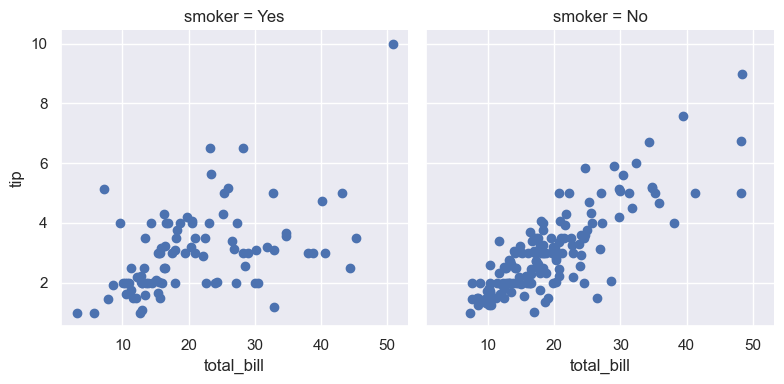

In [10]:
g = sns.FacetGrid(tips, col="smoker", height=4, aspect=1) # crea la griglia 'g' (per la colonna 'smoker' del dataframe 'tips')

g.map(plt.scatter, "total_bill", "tip")                   # metodo che crea scatter plot (il primo argomento) multipli della 
                                                          # colonna 'total_bill' vs la colonna 'tip'

Dall'esame della FacetGrid si può vedere che c'è una **certa correlazione** tra le due variabili, più evidente <u>se il cliente non è uno 'smoker'</u>.

Come sempre negli scatterplot, è possibile plottare una **ulteriore variabile** (categorica) differenziando i punti per simbolo o colore del marker. Qui differenziamo il <u>genere del cliente</u> tramite il colore del marker.

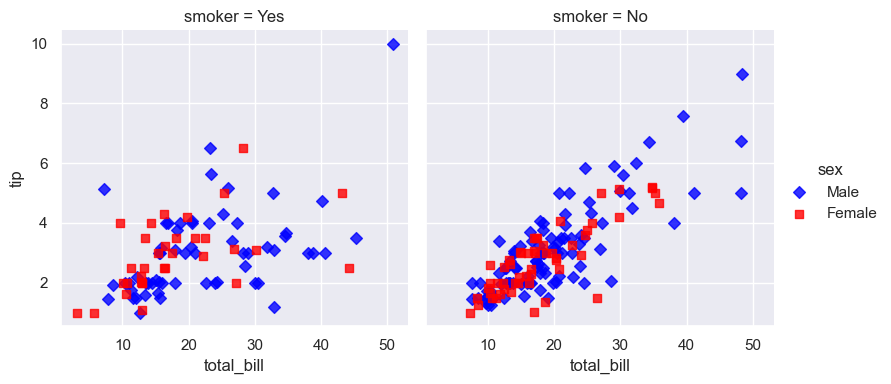

In [11]:
pal = dict(Female='red', Male='blue')                    # la paletta dei colori 

# la creazione della griglia:
g = sns.FacetGrid(tips,                                  # il dataframe in input - come prima
                  col="smoker",                          # la colonna da splittare (nei due plot) - come prima
                  hue="sex",                             # la quarta colonna visualizzata per differenza grafica dei punti
                  palette=pal,                           # la paletta dei colori (per 'sex')
                  height=4, aspect=1,                    # altezza ed aspect ratio dei due plot - come prima
                  hue_kws={"marker": ["D", "s"]})        # differenzia i marker (di 'sex') in diamond (D) e square (s)
                                                         # D si applica agli uomini perchè costituiscono la prima classe (vedi
                                                         # prima)
                                                         

g.map(plt.scatter, "total_bill", "tip", alpha=.8)        # il map dati-griglia (alpha è la saturazione)

g.add_legend();                                          # la legenda

plt.savefig('dvpj_1015.png', dpi=300)                    # il save del plot

La correlazione tra le due variabili è maggiore per le donne?

Possiamo suddividere il dataset per **sottoinsiemi di righe o colonne**. Utilizzando nella mappa un *regplot* (abbreviazione di *regression plot*), anzichè uno scatterplot, possiamo esplorare **5 dimensioni**.

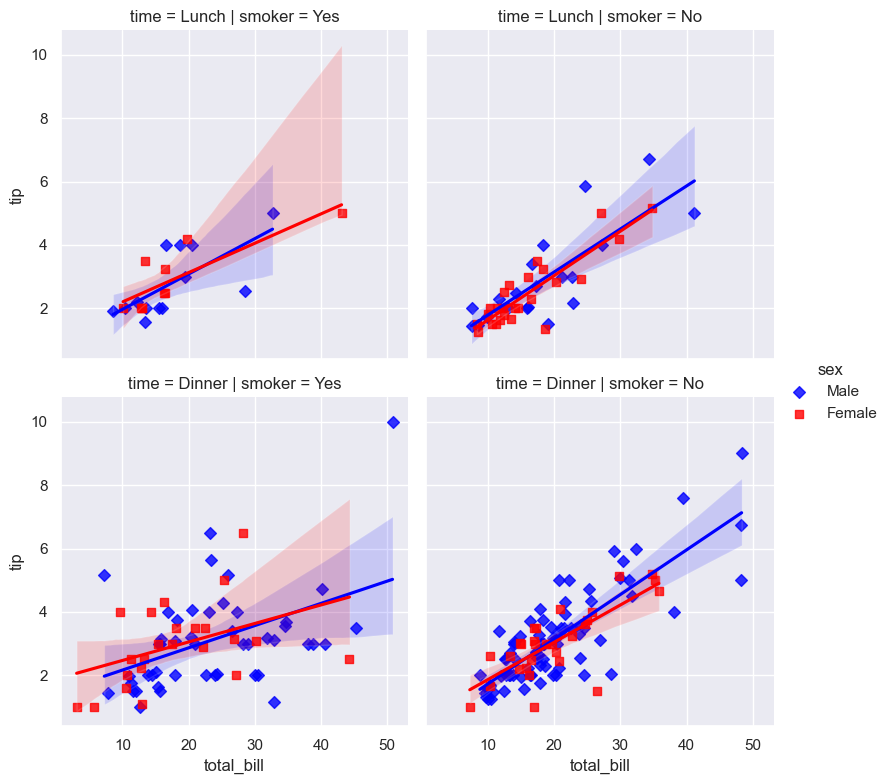

In [12]:
pal = dict(Female='red', Male='blue')
g = sns.FacetGrid(tips, 
                  col="smoker", 
                  row="time",                     # separa le mance per 'time' (lunch oppure dinner) - la COLONNA in più
                  hue="sex", 
                  palette=pal, 
                  height=4, aspect=1, 
                  hue_kws={"marker": ["D", "s"]})
g.map(sns.regplot, "total_bill", "tip")           # il regplot (anzichè lo scatterplot, come fatto prima)
g.add_legend();
plt.savefig('dvpj_1016.png', dpi=300)

Possiamo ottenere lo stesso risultato con il metodo *lmplot* (già visto prima), che <u>combina</u> per comodità un regplot con le FacetGrid. 

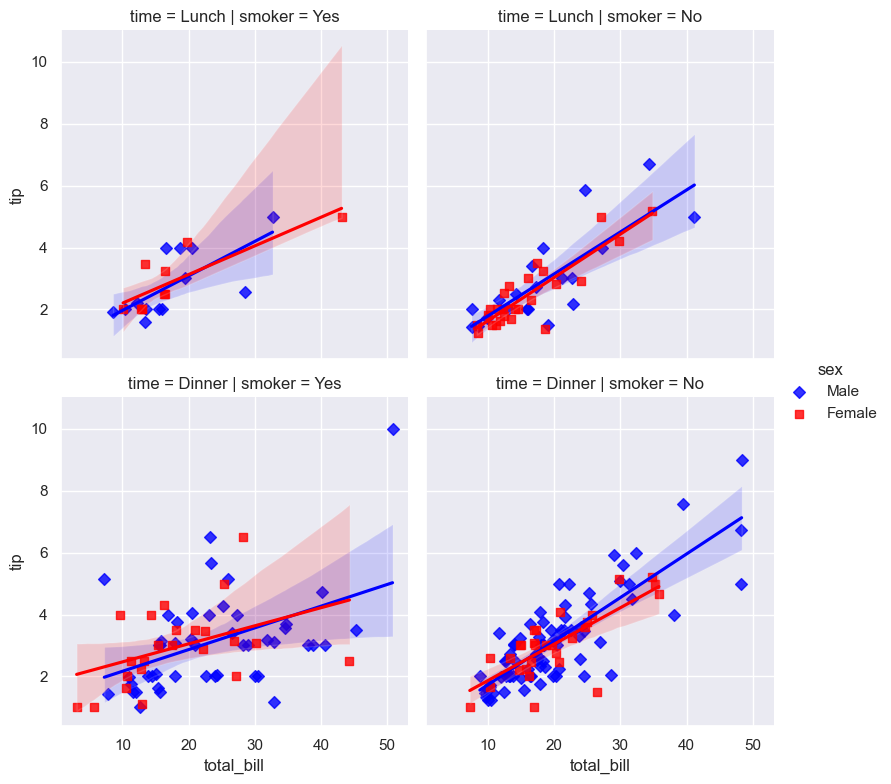

In [13]:
pal = dict(Female='red', Male='blue')

sns.lmplot(x="total_bill", y="tip", 
           hue="sex", 
           height=4, aspect=1, 
           markers=["D", "s"],         # anzichè il dizionario 'kws_hue' usato nel plot FacetGrid di prima
           col="smoker", 
           row="time", 
           data=tips, 
           palette=pal           
           );

**Quale dei due usare**, allora? *lmplot* oppure la combo *regplot* e *FacetGrid*?<br>
*lmplot* è <u>più conciso</u> da specificare, ma la "mappa" di FacetGrid (il metodo *map*) permette di applicare tutta la potenzialità di *seaborn* e *FacetGrid* alla creazione di plot su sottoinsiemi dimensionali. E' una tecnica molto potente ed un modo molto efficace per fare **drill-down sui dati**.

**PairGrids**<br>
Un altro tipo di plot di *seaborn* molto utile per le analisi multi-dimensionali (in modo veloce).<br>
A differenza di *FacetGrid*, non dividiamo il dataset in sottoinsiemi da confrontare ma **confrontiamo tutte le coppie di dimensioni**. E' quindi una sorta di matrice di scatterplot. 

Utilizziamo il classico dataset *iris*.

In [14]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vogliamo catturare la relazione tra sepalo e petalo a seconda della specie di fiore iris.<br>
NB. La PairGrid è applicabile a piccoli dataframe (oppure a subset di essi) per ragioni di leggibilità prima ancora che di prestazioni.

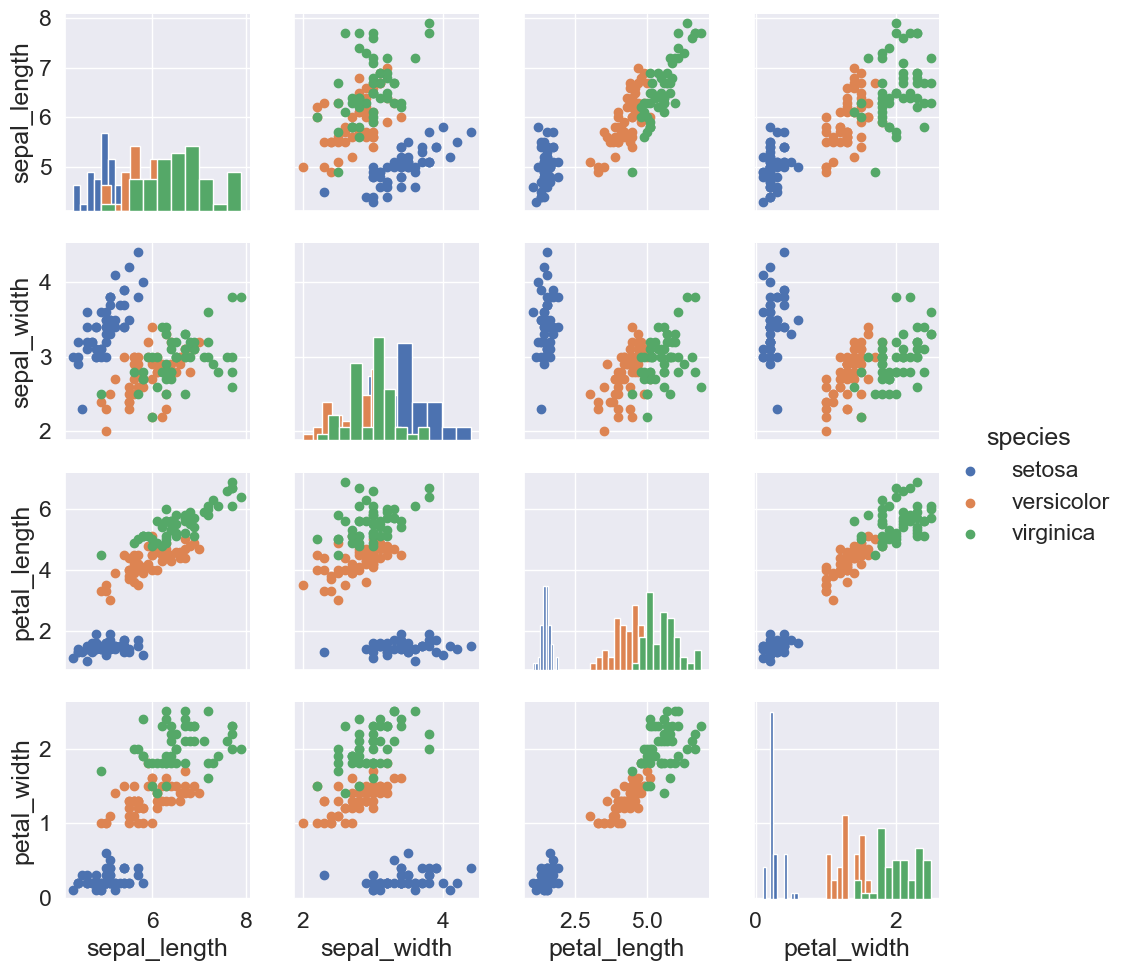

In [15]:
sns.set_theme(font_scale=1.5)           # modifica il font size di default di seaborn

g = sns.PairGrid(iris, hue="species")   # crea la griglia, suddividendo tutti gli istogrammi e gli scatterplot per 'species'
                                        #, height=6, aspect=1)

g.map_diag(plt.hist)                    # mette gli stogrammi (sulla diagonale) per analizzare la distribuzione della dimensione

g.map_offdiag(plt.scatter)              # mette gli scatterplot (fuori dalla diagonale) per confrontare le due dimensioni

g.add_legend();

#plt.savefig('dvpj_1017.png', dpi=300)

In [16]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


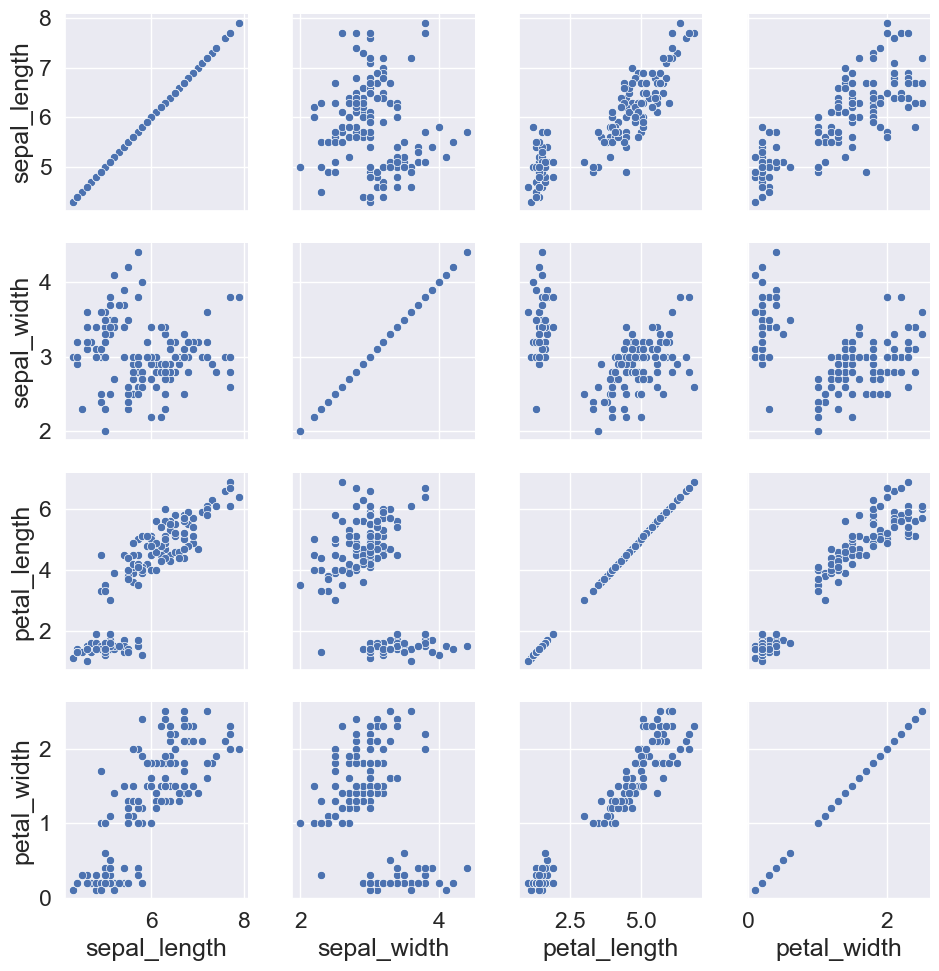

In [17]:
# per confronto:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(sns.scatterplot)     
                                 # --> sulla diagonale NON ci sono gli istogrammi

La scatterplot matrix è **molto informativa**, come si vede. E' un'ottima tecnica per <u>rilevare le correlazioni lineari</u> tra le variabili di un dataset multi-variato in modo VISIVO. Le due matrici triangolari della scatterplot matrix sono ridondanti? Sono differenti *reflection*!

*seaborn* offre anche **altri utili plot (principalmente statistici)**, si veda [questa pagina](https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) che contiene molte variazioni sul tema delle **griglie**.<br>

Per lo studio di *seaborn* si consiglia di cominciare dalla sua [documentazione principale](https://seaborn.pydata.org/index.html): ci sono molti esempi, una API ben documentata e alcuni buoni tutorial che complementano quanto visto in questo notebook. 

**Messaggio finale sul plotting nel Machine Learning (ML)**:
* le nostra capacità di visualizzazione si limitano a 2D/3D (si arriva sino a 4/5 dimensioni con tecniche di sovrapposizione)
* tramite gli spazi multi-dimensionali il ML può operarre efficacemente su dataset di grandi dimensioni
* se possibile, tuttavia, è sempre bene includere nella [analisi esplorativa dei dati](https://en.wikipedia.org/wiki/Exploratory_data_analysis) anche dei plot grafici, perchè a volte alcuni pattern o trend dei dati sono ben rilevabili già in modo visivo
* occorre sempre ricordarsi, tuttavia, che il plotting fornisce informazioni VISIVE, cioè soggette ad una interpretazione personale; in questo sense le metriche sono oggettive e quindi più affidabili; ad esempio. la correlazione può essere misurata anzicxhè semplicemente rilevata visivamente da uno scatterplot
* analisi numeriche ed analisi grafiche sono **complementari**.
